# Pour le polluant PM10

### On importe les bibliothèques

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Conversion des données en DataFrame

In [2]:
# URL et paramètres de la requête
url = "https://data.airpl.org/api/v1/mesure/mensuelle/"
params = {
    "code_configuration_de_mesure__code_point_de_prelevement__code_polluant": 24,
    "date_heure_tu__range": "2021-1-1,2023-12-31",
    "code_configuration_de_mesure__code_point_de_prelevement__code_station__code_commune__code_departement__in": "44,49,53,72,85",
    "export": "json"
}

# Récupérer les données
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    dfPM10 = pd.DataFrame(data['results'])  # Adapter selon la structure des données JSON

    # Sauvegarder le DataFrame pour utilisation ultérieure
    dfPM10.to_pickle('PM10.pkl')
else:
    print(f"Erreur {response.status_code}: {response.text}")

# Afficher les premières lignes du DataFrame
print(dfPM10.head())


                                  id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_PM10_1            24              FR23003_PM10   
1  2023-12-01 00:00:00FR23068_PM10_4            24              FR23068_PM10   
2  2023-12-01 00:00:00FR23070_PM10_3            24              FR23070_PM10   
3  2023-12-01 00:00:00FR23078_PM10_2            24              FR23078_PM10   
4  2023-12-01 00:00:00FR23107_PM10_4            24              FR23107_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23078             SAINT EXUPERY                    Cholet   
4      FR23107            LA CHAUVINIERE                    Nantes   

  code_commune departement_code   departement_nom  code_zone_affichage  \
0        44052          

In [3]:
# Charger le DataFrame depuis le fichier sauvegardé
dfPM10 = pd.read_pickle('PM10.pkl')

# Afficher les types de chaque colonne
print(dfPM10.dtypes)


id                               object
code_polluant                    object
code_point_de_prelevement        object
code_station                     object
nom_station                      object
nom_commune                      object
code_commune                     object
departement_code                 object
departement_nom                  object
code_zone_affichage               int64
date_heure_tu                    object
date_heure_local                 object
valeur_originale                float64
valeur                          float64
validite                           bool
code_configuration_de_mesure     object
dtype: object


## Analyse et correction du dataset

### Types et valeurs manquantes par variable

In [4]:
dfPM10.shape

(729, 16)

In [5]:
dfPM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            729 non-null    object 
 1   code_polluant                 729 non-null    object 
 2   code_point_de_prelevement     729 non-null    object 
 3   code_station                  729 non-null    object 
 4   nom_station                   729 non-null    object 
 5   nom_commune                   729 non-null    object 
 6   code_commune                  729 non-null    object 
 7   departement_code              729 non-null    object 
 8   departement_nom               729 non-null    object 
 9   code_zone_affichage           729 non-null    int64  
 10  date_heure_tu                 729 non-null    object 
 11  date_heure_local              729 non-null    object 
 12  valeur_originale              684 non-null    float64
 13  valeu

In [6]:
dfPM10.isnull().sum()

id                               0
code_polluant                    0
code_point_de_prelevement        0
code_station                     0
nom_station                      0
nom_commune                      0
code_commune                     0
departement_code                 0
departement_nom                  0
code_zone_affichage              0
date_heure_tu                    0
date_heure_local                 0
valeur_originale                45
valeur                          45
validite                         0
code_configuration_de_mesure     0
dtype: int64

Observations : 
- On remarque que pour les colonnes "valeur_originale" et "valeur" on a quelques lignes vides (37), mais aucune colonne entièrement vide
- Les types des différentes colonnes semblent cohérant par rapport à ce qu'elles affichent

## Visualiser les différentes données de chaque colonne

### Pour les colonnes de type float64

In [7]:
for col in dfPM10.select_dtypes('float64'):
    print(f'{col :-<20} {dfPM10[col].unique()}')

valeur_originale---- [14.703268 13.845743 13.207121 14.437269 14.799597 16.016296 13.844456
 13.69738  11.212879 11.491947 13.644631 11.693145 12.503688 11.722379
 15.213663 19.120575 17.169493 14.915053 15.857918 17.315884 15.804879
 13.688317       nan 12.89322  16.59757  15.26243  15.72821  13.129271
 13.82365  12.325356 12.232453 14.993402 11.575278 12.933588 11.598619
 15.479178 18.541807 15.948601 13.80017  15.93206  18.507591 12.995968
 11.939107 11.952682 15.144767 13.050617 14.15175  15.055115 15.018212
 13.518208 14.214963 14.134863 12.936828 11.582056 13.323688 14.617453
 17.685814 13.622661 12.886518 13.599592 15.197661 16.376551 14.728593
 15.241199 15.466693 15.189548 15.572867 16.44437  17.205671 13.878689
 15.086312 14.49725  14.281131 15.783613 14.516237 15.575665 13.882277
 16.398445 19.339804 12.570506 15.912861 16.470591 15.935651 10.124685
  9.114499  8.448091 10.688625  8.433603  8.48069  10.013508  9.44375
  9.47298  10.543723 10.132714 10.020132  9.217624  8.931

In [8]:
for col in dfPM10.select_dtypes('int64'):
    print(f'{col :-<20} {dfPM10[col].unique()}')

code_zone_affichage- [ 3  4  1  2  5  6 13  7 11  8]


In [9]:
for col in dfPM10.select_dtypes('object'):
    print(f'{col :-<20} {dfPM10[col].unique()}')

id------------------ ['2023-12-01 00:00:00FR23003_PM10_1' '2023-12-01 00:00:00FR23068_PM10_4'
 '2023-12-01 00:00:00FR23070_PM10_3' '2023-12-01 00:00:00FR23078_PM10_2'
 '2023-12-01 00:00:00FR23107_PM10_4' '2023-12-01 00:00:00FR23110_PM10_3'
 '2023-12-01 00:00:00FR23120_PM10_4' '2023-12-01 00:00:00FR23123_PM10_2'
 '2023-12-01 00:00:00FR23124_PM10_3' '2023-12-01 00:00:00FR23124_PM10_4'
 '2023-12-01 00:00:00FR23152_PM10_4' '2023-12-01 00:00:00FR23177_PM10_4'
 '2023-12-01 00:00:00FR23178_PM10_3' '2023-12-01 00:00:00FR23182_PM10_3'
 '2023-12-01 00:00:00FR23188_PM10_4' '2023-12-01 00:00:00FR23238_PM10_A'
 '2023-12-01 00:00:00FR23239_PM10_A' '2023-12-01 00:00:00FR23242_PM10_1'
 '2023-12-01 00:00:00FR23249_PM10_1' '2023-12-01 00:00:00FR23251_PM10_1'
 '2023-11-01 00:00:00FR23003_PM10_1' '2023-11-01 00:00:00FR23068_PM10_4'
 '2023-11-01 00:00:00FR23070_PM10_2' '2023-11-01 00:00:00FR23070_PM10_3'
 '2023-11-01 00:00:00FR23078_PM10_2' '2023-11-01 00:00:00FR23107_PM10_4'
 '2023-11-01 00:00:00FR23110_P

Observations : 
- on remarque que pour les colonnes de type float64, pour les colonnes "valeur_originale" et "valeur", des valeurs ne sont pas correctes car il y à une présence de "nan" et "-999.".
- Nous allons donc supprimer les lignes ou ces dernières sont présentes, et donc supprimer toutes les valeurs qui seront négatives pour englober.

### Supression des valeurs "nan" et "-999" pour les colonnes "valeur_originale" et "valeur"

In [10]:
# Supprimer les lignes comportant des valeurs "NaN" dans les colonnes "valeur" et "valeur_originale"
dfPM10.dropna(subset=['valeur', 'valeur_originale'], inplace=True)
    
# Supprimer les lignes comportant des valeurs négatives dans les colonnes "valeur" et "valeur_originale"
dfPM10 = dfPM10[(dfPM10['valeur'] >= 0) & (dfPM10['valeur_originale'] >= 0)]

In [11]:
for col in dfPM10.select_dtypes('float64'):
    print(f'{col :-<20} {dfPM10[col].unique()}')

valeur_originale---- [14.703268 13.845743 13.207121 14.437269 14.799597 16.016296 13.844456
 13.69738  11.212879 11.491947 13.644631 11.693145 12.503688 11.722379
 15.213663 19.120575 17.169493 14.915053 15.857918 17.315884 15.804879
 13.688317 12.89322  16.59757  15.26243  15.72821  13.129271 13.82365
 12.325356 12.232453 14.993402 11.575278 12.933588 11.598619 15.479178
 18.541807 15.948601 13.80017  15.93206  18.507591 12.995968 11.939107
 11.952682 15.144767 13.050617 14.15175  15.055115 15.018212 13.518208
 14.214963 14.134863 12.936828 11.582056 13.323688 14.617453 17.685814
 13.622661 12.886518 13.599592 15.197661 16.376551 14.728593 15.241199
 15.466693 15.189548 15.572867 16.44437  17.205671 13.878689 15.086312
 14.49725  14.281131 15.783613 14.516237 15.575665 13.882277 16.398445
 19.339804 12.570506 15.912861 16.470591 15.935651 10.124685  9.114499
  8.448091 10.688625  8.433603  8.48069  10.013508  9.44375   9.47298
 10.543723 10.132714 10.020132  9.217624  8.931381 11.2983

## Comparaison avec les valeurs de seuils

Nous faisons le choix dans un premier temps de ne traiter que les données mensuelles, en prenant en granularité les données mensuelles, de manière à comparer les trimestres des différentes années

In [12]:
# Définition des seuils pour les particules PM10 en µg/m3
OBJECTIF_QUALITE_PM10 = 30  # en moyenne annuelle
VALEUR_LIMITE_ANNUELLE_PM10 = 40  # en moyenne annuelle

# Afficher les seuils définis
print(f"Objectif de qualité PM10 : {OBJECTIF_QUALITE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Valeur limite annuelle PM10 : {VALEUR_LIMITE_ANNUELLE_PM10} µg/m3 (en moyenne annuelle)")


Objectif de qualité PM10 : 30 µg/m3 (en moyenne annuelle)
Valeur limite annuelle PM10 : 40 µg/m3 (en moyenne annuelle)


Création d'une variable cible qui vaut 1 si la valeur est supérieure au seuil et 0 sinon
On ajoute ces colonnes au dataframe

In [13]:
# Convertir les colonnes de date en format datetime
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Ajouter des colonnes de comparaison avec les seuils (variable cible)
dfPM10['cible_objectif_qualite_PM10'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10).astype(int)
dfPM10['cible_valeur_limite_annuelle_PM10'] = (dfPM10['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10).astype(int)

# Afficher les premières lignes du DataFrame avec les nouvelles colonnes de comparaison
print(dfPM10.head())

# Sauvegarder le DataFrame avec les nouvelles colonnes de comparaison
dfPM10.to_pickle('PM10_with_comparison.pkl')


                                  id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_PM10_1            24              FR23003_PM10   
1  2023-12-01 00:00:00FR23068_PM10_4            24              FR23068_PM10   
2  2023-12-01 00:00:00FR23070_PM10_3            24              FR23070_PM10   
3  2023-12-01 00:00:00FR23078_PM10_2            24              FR23078_PM10   
4  2023-12-01 00:00:00FR23107_PM10_4            24              FR23107_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23078             SAINT EXUPERY                    Cholet   
4      FR23107            LA CHAUVINIERE                    Nantes   

  code_commune departement_code   departement_nom  code_zone_affichage  \
0        44052          

### Distribution des variables cibles : 

In [14]:
# Afficher le nombre de valeurs 0 et 1 dans la colonne 'cible_objectif_qualite_PM10'
print(dfPM10['cible_objectif_qualite_PM10'].value_counts())
print(dfPM10['cible_valeur_limite_annuelle_PM10'].value_counts())


cible_objectif_qualite_PM10
0    684
Name: count, dtype: int64
cible_valeur_limite_annuelle_PM10
0    684
Name: count, dtype: int64


Observations : on remarque ici qu'aucune valeur ne dépasse le seuil, nous avons donc fait le choix de modifier ce dernier de manière arbitraire pour rendre l'exercice plus intéressant, toutes les valeurs seront donc divisées par 2
De plus pour visualiser les résultats par mois, on décide de créer une valeur de seuil mensuelle nommé "OBJECTIF_QUALITE_PM10_MENSUEL" et qui aura pour valeur 35 (car la moyenne annuelle étant à 30 et la valeur limite annuelle étant à 40 on prend l'entre deux) qu'on va venir diviser par 2 pour avoir des résultats, on va prendre 18 pour arrondir à la valeur au-dessus

In [15]:
# Définition des nouveaux seuils pour les particules PM10 en µg/m3
OBJECTIF_QUALITE_PM10 = 15  # en moyenne annuelle
VALEUR_LIMITE_ANNUELLE_PM10 = 20  # en moyenne annuelle
OBJECTIF_QUALITE_PM10_MENSUEL = 18 #en moyenne mensuelle

# Afficher les nouveaux seuils définis
print(f"Objectif de qualité PM10 : {OBJECTIF_QUALITE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Valeur limite annuelle PM10 : {VALEUR_LIMITE_ANNUELLE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Objectif de qualité PM10 mensuelle : {OBJECTIF_QUALITE_PM10_MENSUEL} µg/m3 (en moyenne mensuelle)")

Objectif de qualité PM10 : 15 µg/m3 (en moyenne annuelle)
Valeur limite annuelle PM10 : 20 µg/m3 (en moyenne annuelle)
Objectif de qualité PM10 mensuelle : 18 µg/m3 (en moyenne mensuelle)


In [16]:
# Convertir les colonnes de date en format datetime
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Ajouter des colonnes de comparaison avec les seuils (variable cible)
dfPM10['cible_objectif_qualite_PM10'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10).astype(int)
dfPM10['cible_valeur_limite_annuelle_PM10'] = (dfPM10['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10).astype(int)
dfPM10['cible_objectif_qualite_PM10_mensuelle'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL).astype(int)

# Afficher les premières lignes du DataFrame avec les nouvelles colonnes de comparaison
print(dfPM10.head())

# Sauvegarder le DataFrame avec les nouvelles colonnes de comparaison
dfPM10.to_pickle('PM10_with_comparison.pkl')

                                  id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_PM10_1            24              FR23003_PM10   
1  2023-12-01 00:00:00FR23068_PM10_4            24              FR23068_PM10   
2  2023-12-01 00:00:00FR23070_PM10_3            24              FR23070_PM10   
3  2023-12-01 00:00:00FR23078_PM10_2            24              FR23078_PM10   
4  2023-12-01 00:00:00FR23107_PM10_4            24              FR23107_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23078             SAINT EXUPERY                    Cholet   
4      FR23107            LA CHAUVINIERE                    Nantes   

  code_commune departement_code   departement_nom  code_zone_affichage  \
0        44052          

In [17]:
# Afficher le nombre de valeurs 0 et 1 dans la colonne 'cible_objectif_qualite_PM10'
print(dfPM10['cible_objectif_qualite_PM10'].value_counts())
print(dfPM10['cible_valeur_limite_annuelle_PM10'].value_counts())
print(dfPM10['cible_objectif_qualite_PM10_mensuelle'].value_counts())


cible_objectif_qualite_PM10
0    393
1    291
Name: count, dtype: int64
cible_valeur_limite_annuelle_PM10
0    615
1     69
Name: count, dtype: int64
cible_objectif_qualite_PM10_mensuelle
0    550
1    134
Name: count, dtype: int64


Observations : 
- Les variables cible_objectif_qualite_PM10 et cible_objectif_qualite_PM10_mensuelle sont plutot équilibrés, il y à donc un problème sur l'objectif qualité PM10, avec beaucoup d'alertes
- La variable cible_valeur_limite_annuelle_PM10 est plutot déséquilibré, l'indice semble donc plutôt correcte.

## Visualisation des données par des graphiques

Graphique pour voir par année, quand est-ce qu'on à dépassé le seuil de cible_objectif_qualité_PM10 (valeur de seuil = 15, en rouge quand depassé)

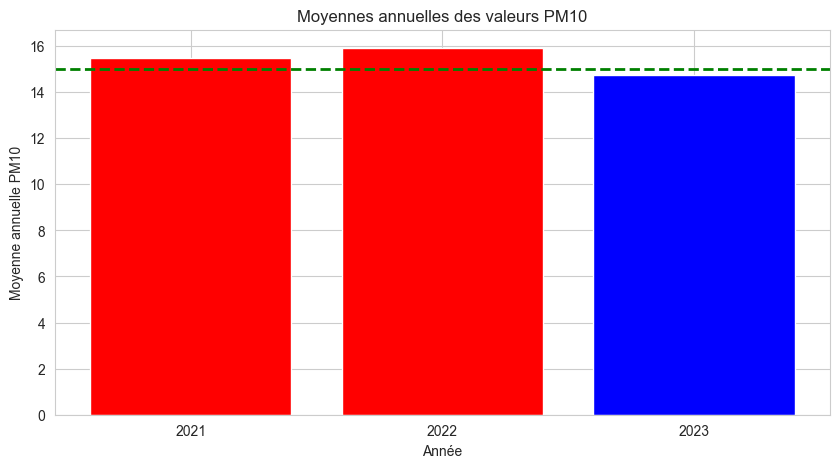

In [18]:
# Grouper les données par année
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
annual_means = dfPM10.groupby('année')['valeur'].mean().reset_index()

# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means['depasse_seuil'] = (annual_means['valeur'] > OBJECTIF_QUALITE_PM10).astype(int)

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means['depasse_seuil']]
plt.bar(annual_means['année'], annual_means['valeur'], color=colors)
plt.axhline(y=OBJECTIF_QUALITE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle PM10')
plt.title('Moyennes annuelles des valeurs PM10')
plt.xticks(annual_means['année'])
plt.show()


Graphique pour voir par année, quand est-ce qu'on à dépassé le seuil de la valeur limite annuelle (valeur de seuil = 20, en rouge quand depassé)

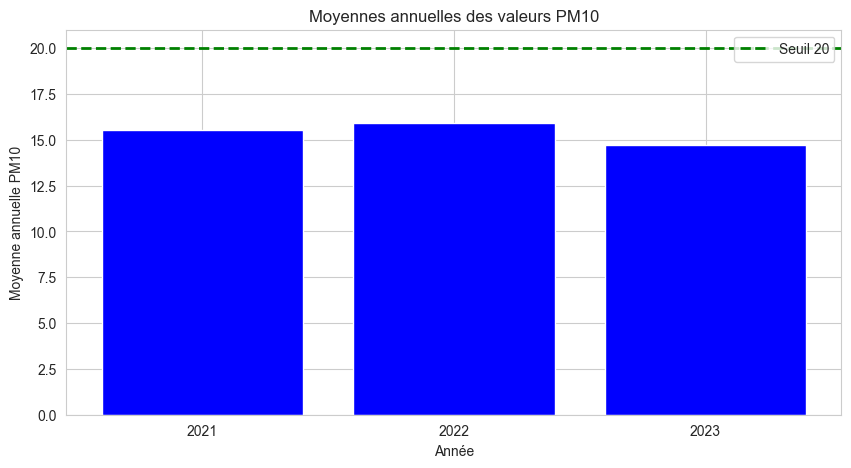

In [19]:
# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means['depasse_seuil'] = (annual_means['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10).astype(int)

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means['depasse_seuil']]
plt.bar(annual_means['année'], annual_means['valeur'], color=colors)
plt.axhline(y=VALEUR_LIMITE_ANNUELLE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil {VALEUR_LIMITE_ANNUELLE_PM10}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle PM10')
plt.title('Moyennes annuelles des valeurs PM10')
plt.xticks(annual_means['année'])
plt.legend()
plt.show()


#### Fusion des 2 graphiques, si un des seuils est dépassé, la colonne devient rouge

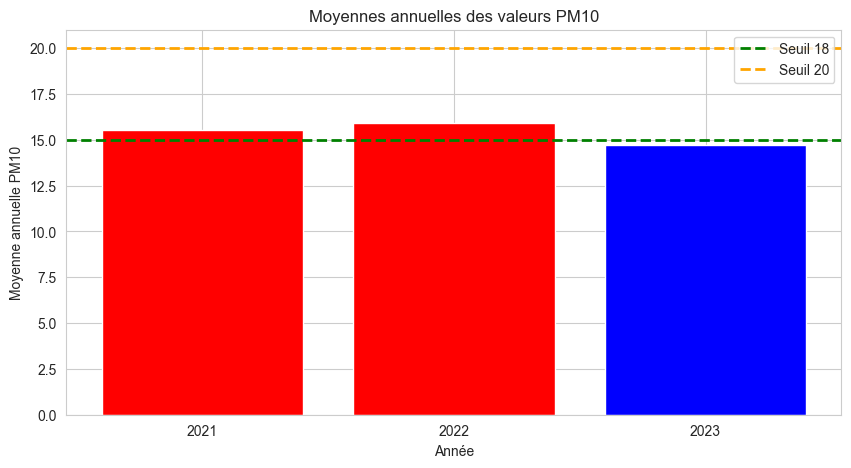

In [20]:
# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means['depasse_seuil'] = ((annual_means['valeur'] > OBJECTIF_QUALITE_PM10).astype(int) |
                                (annual_means['valeur'] > OBJECTIF_QUALITE_PM10).astype(int))

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means['depasse_seuil']]
plt.bar(annual_means['année'], annual_means['valeur'], color=colors)
plt.axhline(y=OBJECTIF_QUALITE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
plt.axhline(y=VALEUR_LIMITE_ANNUELLE_PM10, color='orange', linestyle='--', linewidth=2, label=f'Seuil {VALEUR_LIMITE_ANNUELLE_PM10}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle PM10')
plt.title('Moyennes annuelles des valeurs PM10')
plt.xticks(annual_means['année'])
plt.legend()
plt.show()

Graphique pour voir par année et par mois, quand est-ce qu'on à dépassé le seuil de cible_objectif_qualité_PM10_mensuel (valeur de seuil = 18, en rouge quand depassé)

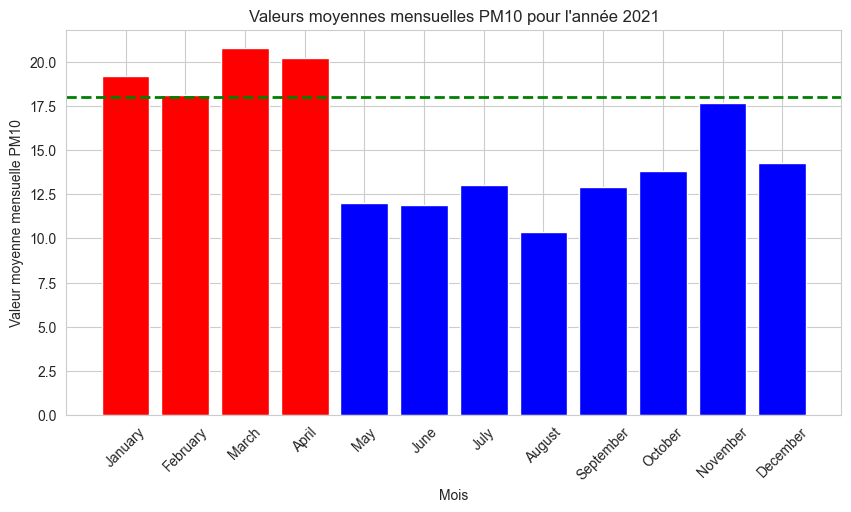

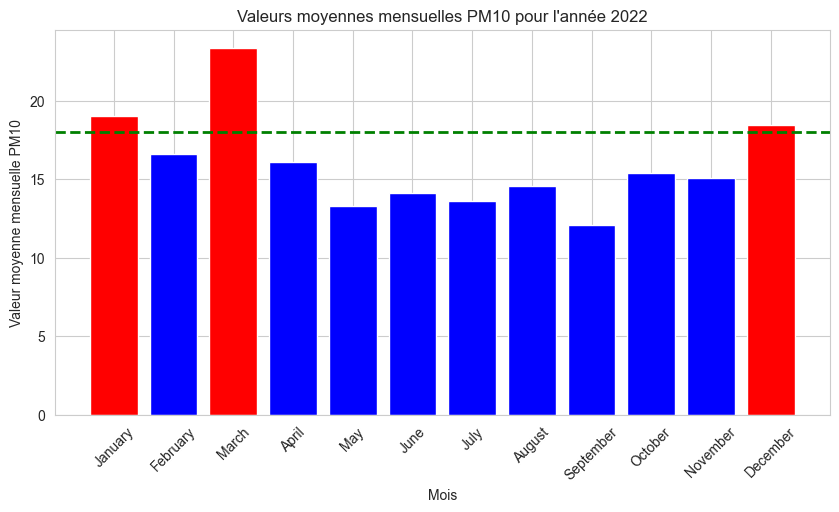

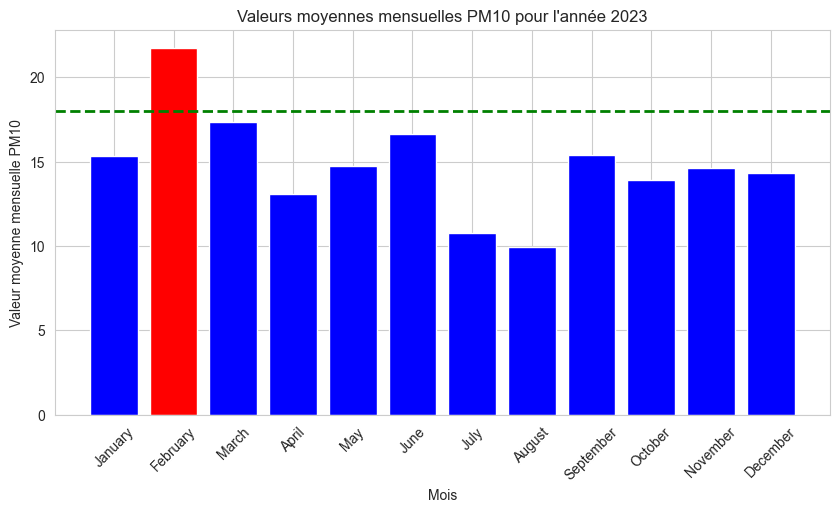

In [21]:
import calendar

# Grouper les données par année et mois
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
dfPM10['mois'] = dfPM10['date_heure_tu'].dt.month
grouped = dfPM10.groupby(['année', 'mois'])[['valeur']].mean().reset_index()

# Créer la colonne indiquant si la moyenne mensuelle dépasse le seuil
grouped['depasse_seuil'] = (grouped['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL).astype(int)

# Créer le diagramme en bâtons pour chaque année
for year in grouped['année'].unique():
    plt.figure(figsize=(10, 5))
    subset = grouped[grouped['année'] == year]
    colors = ['red' if x == 1 else 'blue' for x in subset['depasse_seuil']]
    months = [calendar.month_name[m] for m in subset['mois']]
    plt.bar(months, subset['valeur'], color=colors)
    plt.axhline(y=OBJECTIF_QUALITE_PM10_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
    plt.xlabel('Mois')
    plt.ylabel('Valeur moyenne mensuelle PM10')
    plt.title(f'Valeurs moyennes mensuelles PM10 pour l\'année {year}')
    plt.xticks(rotation=45)
    plt.show()


## Ajout d'alerte quand les variables de seuils sont dépassées

### Pour les valeurs de seuils annuels

In [25]:
# Convertir les colonnes de date en format datetime si ce n'est pas déjà fait
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Grouper les données par année
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
grouped = dfPM10.groupby('année')[['valeur']].mean().reset_index()

# Arrondir les valeurs moyennes à un chiffre après la virgule
grouped['valeur'] = grouped['valeur'].round(1)

# Créer la colonne indiquant si la moyenne annuelle dépasse un des seuils
grouped['depasse_objectif_qualite'] = grouped['valeur'] > OBJECTIF_QUALITE_PM10
grouped['depasse_valeur_limite'] = grouped['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10

# Regrouper les alertes par type
alertes_qualite = grouped[grouped['depasse_objectif_qualite']]
alertes_limite = grouped[grouped['depasse_valeur_limite']]

# Afficher les alertes par type pour les moyennes annuelles
if not alertes_qualite.empty:
    print("Alertes pour l'Objectif de Qualité annuel:")
    for index, row in alertes_qualite.iterrows():
        print(f"Alerte: Valeur moyenne annuelle {row['valeur']} dépasse l'Objectif de Qualité annuel ({OBJECTIF_QUALITE_PM10} µg/m3) en {row['année']}")
else:
    print("Aucune alerte pour l'Objectif de Qualité annuel.")

if not alertes_limite.empty:
    print("\nAlertes pour la Valeur Limite annuelle:")
    for index, row in alertes_limite.iterrows():
        print(f"Alerte: Valeur moyenne annuelle {row['valeur']} dépasse la Valeur Limite annuelle ({VALEUR_LIMITE_ANNUELLE_PM10} µg/m3) en {row['année']}")
else:
    print("Aucune alerte pour la Valeur Limite annuelle.")


Alertes pour l'Objectif de Qualité annuel:
Alerte: Valeur moyenne annuelle 15.5 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2021
Alerte: Valeur moyenne annuelle 15.9 dépasse l'Objectif de Qualité annuel (15 µg/m3) en 2022
Aucune alerte pour la Valeur Limite annuelle.


### Pour les valeurs de seuils mensuels

In [24]:
# Convertir les colonnes de date en format datetime si ce n'est pas déjà fait
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Grouper les données par année et mois
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
dfPM10['mois'] = dfPM10['date_heure_tu'].dt.month
grouped = dfPM10.groupby(['année', 'mois'])[['valeur']].mean().reset_index()

# Arrondir les valeurs moyennes à un chiffre après la virgule
grouped['valeur'] = grouped['valeur'].round(1)

# Créer la colonne indiquant si la moyenne mensuelle dépasse le seuil
grouped['depasse_objectif_qualite'] = grouped['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL

# Extraire les mois en lettres
grouped['mois_lettres'] = grouped['mois'].apply(lambda x: calendar.month_name[x])

# Regrouper les alertes par type
alertes_qualite = grouped[grouped['depasse_objectif_qualite']]

# Afficher les alertes par type pour les moyennes mensuelles
if not alertes_qualite.empty:
    print("Alertes pour l'Objectif de Qualité mensuel:")
    for index, row in alertes_qualite.iterrows():
        print(f"Alerte: Valeur moyenne {row['valeur']} dépasse l'Objectif de Qualité mensuel ({OBJECTIF_QUALITE_PM10_MENSUEL} µg/m3) en {row['mois_lettres']} {row['année']}")
else:
    print("Aucune alerte pour l'Objectif de Qualité mensuel.")


Alertes pour l'Objectif de Qualité mensuel:
Alerte: Valeur moyenne 19.2 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en January 2021
Alerte: Valeur moyenne 18.2 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en February 2021
Alerte: Valeur moyenne 20.8 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en March 2021
Alerte: Valeur moyenne 20.2 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en April 2021
Alerte: Valeur moyenne 19.0 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en January 2022
Alerte: Valeur moyenne 23.4 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en March 2022
Alerte: Valeur moyenne 18.5 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en December 2022
Alerte: Valeur moyenne 21.7 dépasse l'Objectif de Qualité mensuel (18 µg/m3) en February 2023
